In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('AmazonReview.csv')
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [8]:
df.shape

(14999, 2)

In [9]:
df.describe()

,Sentiment
count,14999.000000
mean,3.250017
std,1.421653
min,1.000000
25%,2.000000
50%,4.000000
75%,4.500000
max,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     14998 non-null  object
 1   Sentiment  14999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


In [11]:
df.dropna(inplace=True)

In [12]:
df.Sentiment.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [13]:
#1,2,3->negative(i.e 0)
df.loc[df['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
df.loc[df['Sentiment']>3,'Sentiment'] = 1

df.Sentiment.unique()

array([0, 1], dtype=int64)

In [14]:
data = df['Review']

In [15]:
data.head()

0    Fast shipping but this product is very cheaply...
1    This case takes so long to ship and it's not e...
2    Good for not droids. Not good for iPhones. You...
3    The cable was not compatible between my macboo...
4    The case is nice but did not have a glow light...
Name: Review, dtype: object

In [16]:
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

In [17]:
data=data.str.lower()

In [18]:
data.head()

0    fast shipping but this product is very cheaply...
1    this case takes so long to ship and it s not e...
2    good for not droids  not good for iphones  you...
3    the cable was not compatible between my macboo...
4    the case is nice but did not have a glow light...
Name: Review, dtype: object

In [19]:
classes = df.Sentiment.unique()
print(classes)

[0 1]


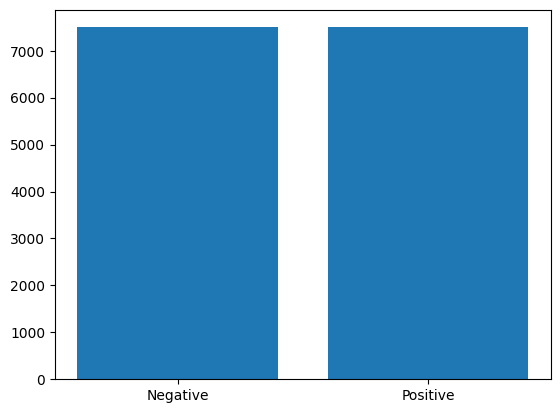

In [20]:
counts = []
for i in classes:
  count = len(df[df.Sentiment == i])
  counts.append(count)
plt.bar(['Negative','Positive'],counts)
plt.show()

In [21]:
reviewText=[]
for i in data:
    reviewText.append(i)

In [22]:
type(reviewText)

list

In [23]:
df['Review']=data

In [24]:
df.head()

,Review,Sentiment
0,fast shipping but this product is very cheaply...,0
1,this case takes so long to ship and it s not e...,0
2,good for not droids not good for iphones you...,0
3,the cable was not compatible between my macboo...,0
4,the case is nice but did not have a glow light...,0


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)
X = cv.fit_transform(reviewText).toarray()
y = df.iloc[:, -1].values

In [26]:
import pickle
pickle.dump(cv, open('model_final.pkl', "wb"))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

In [28]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [29]:
import joblib
joblib.dump(classifier,'Classifier__Model') 

['Classifier__Model']

In [30]:
score=classifier.score(X_test,y_test)
print('Accuracy: ',score)

Accuracy:  0.794


<AxesSubplot: xlabel='Sentiment', ylabel='count'>

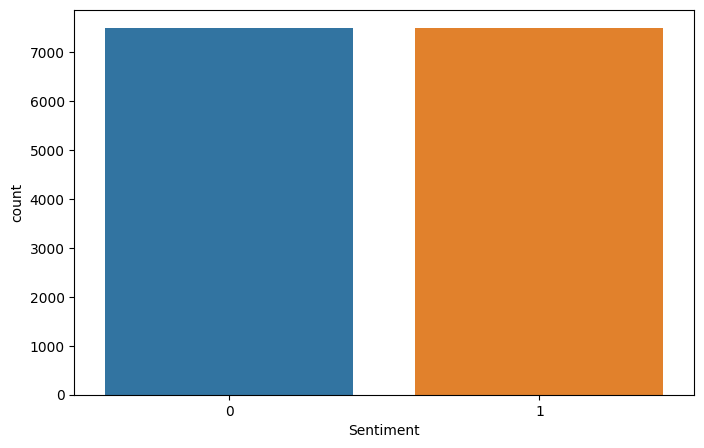

In [32]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x=df.Sentiment)